<a href="https://colab.research.google.com/github/kridtapon/Gap-and-Go-Momentum-strategy/blob/main/Gap_and_Go_Momentum_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.26.2-py3-none-any.whl size=527326 sha256=0482790b9788d032cdd63a56e8fe5fe4404bd69868334e630a6cc477062d7fab
  Stored in directory: /root/.cache/pip/wheels/35/a3/d2/ae1a8cbf659fffc7d1890123df1a7fa2e7f6df587c1dca71cd
Successfully built vectorbt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      

In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [2]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=7f17551ed37c6e599b97b1405cf9cc001c892f4b1e2749e27ea1b48e458f02c2
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
import seaborn as sns

In [83]:
# Download the data
data = yf.download("BTC-USD", start="2014-11-30", end="2024-11-30", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [82]:
# Replace 'your_file.csv' with the path to your CSV file
data = pd.read_csv('April-October-2024.csv')

# Display the first few rows of the DataFrame
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'April-October-2024.csv'

In [84]:
data_clean = data.copy()

In [85]:
#df = df.dropna()

data_clean = data_clean.ffill()

In [86]:
data_clean.columns = ['Date','Close','High','Low','Open','Volume']

In [87]:
data_clean.drop(['Date'], axis='columns', inplace=True)

In [88]:
df_N = data_clean.copy()

In [89]:
df_N

,Close,High,Low,Open,Volume
Date,,,,,
2014-11-30 00:00:00+00:00,378.046997,382.527008,373.308990,375.510010,9194440
2014-12-01 00:00:00+00:00,379.244995,383.661987,376.669006,378.248993,11763000
2014-12-02 00:00:00+00:00,381.315002,384.037994,377.863007,379.250000,12364100
2014-12-03 00:00:00+00:00,375.010010,383.026001,374.346008,381.721985,13340100
2014-12-04 00:00:00+00:00,369.604004,378.654999,367.759003,375.717987,14529600
...,...,...,...,...,...
2024-11-25 00:00:00+00:00,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
2024-11-26 00:00:00+00:00,91985.320312,94991.750000,90770.812500,93087.281250,91656519855
2024-11-27 00:00:00+00:00,95962.531250,97361.179688,91778.664062,91978.140625,71133452438


In [90]:
data = df_N

In [91]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2014-11-30 00:00:00+00:00,378.046997,382.527008,373.308990,375.510010,9194440
2014-12-01 00:00:00+00:00,379.244995,383.661987,376.669006,378.248993,11763000
2014-12-02 00:00:00+00:00,381.315002,384.037994,377.863007,379.250000,12364100
2014-12-03 00:00:00+00:00,375.010010,383.026001,374.346008,381.721985,13340100
2014-12-04 00:00:00+00:00,369.604004,378.654999,367.759003,375.717987,14529600
...,...,...,...,...,...
2024-11-25 00:00:00+00:00,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
2024-11-26 00:00:00+00:00,91985.320312,94991.750000,90770.812500,93087.281250,91656519855
2024-11-27 00:00:00+00:00,95962.531250,97361.179688,91778.664062,91978.140625,71133452438


In [92]:
df = data['Close']

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




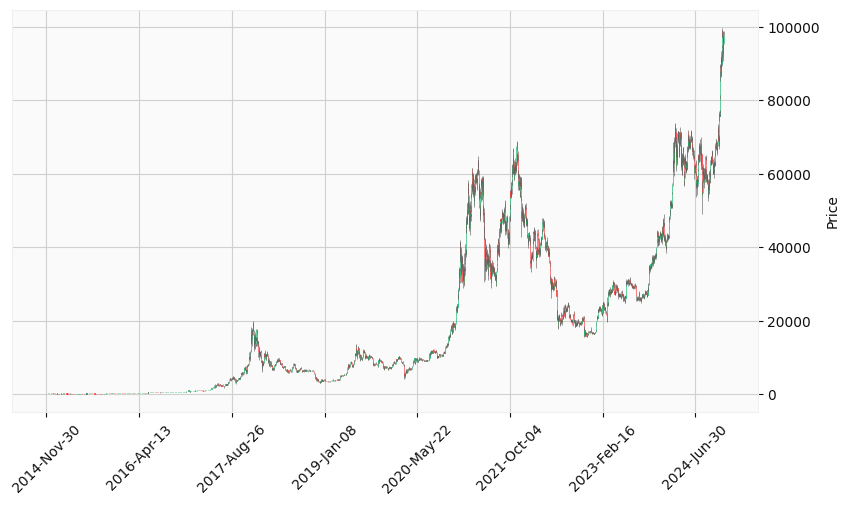

In [93]:
mpf.plot(data, style='yahoo',type='candle',figratio=(18,10))

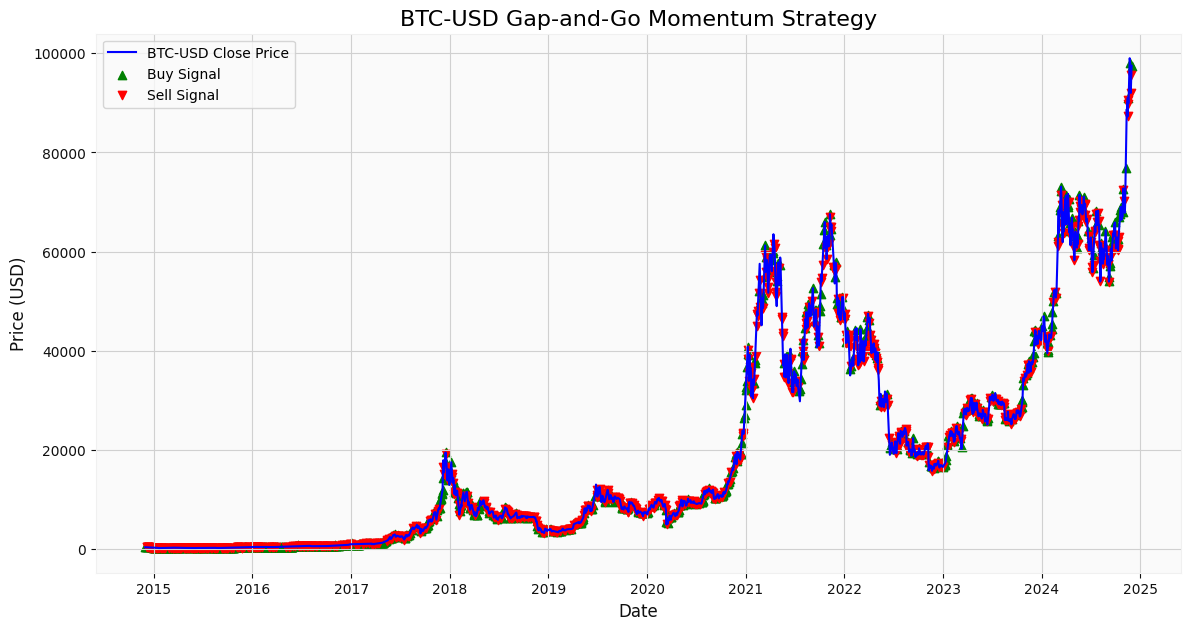

Buy Signals:
                                   Open         Close  Buy_Signal
Date                                                             
2024-10-29 00:00:00+00:00  69910.046875  72720.492188        True
2024-11-09 00:00:00+00:00  76556.187500  76778.867188        True
2024-11-15 00:00:00+00:00  87284.179688  91066.007812        True
2024-11-24 00:00:00+00:00  97778.093750  98013.820312        True
2024-11-29 00:00:00+00:00  95653.953125  97461.523438        True

Sell Signals:
                                   Open         Close  Sell_Signal
Date                                                              
2024-11-14 00:00:00+00:00  90574.882812  87250.429688         True
2024-11-16 00:00:00+00:00  91064.367188  90558.476562         True
2024-11-17 00:00:00+00:00  90558.460938  89845.851562         True
2024-11-26 00:00:00+00:00  93087.281250  91985.320312         True
2024-11-28 00:00:00+00:00  95954.945312  95652.468750         True


In [94]:
# Calculate the gap (difference between the opening and previous day's closing price)
data['Previous_Close'] = data['Close'].shift(1)
data['Gap_Up'] = data['Open'] > data['Previous_Close']  # Gap up condition (price opens higher than previous close)
data['Gap_Down'] = data['Open'] < data['Previous_Close']  # Gap down condition (price opens lower than previous close)

# Define the Gap-and-Go Strategy
# Buy when there's a Gap Up and the price continues higher (close > open).
# Sell (or short) when there's a Gap Down and the price continues lower (close < open).

# Gap-and-Go buy condition
data['Buy_Signal'] = (data['Gap_Up']) & (data['Close'] > data['Open'])

# Gap-and-Go sell condition (for shorting)
data['Sell_Signal'] = (data['Gap_Down']) & (data['Close'] < data['Open'])

# Filter the data for signals
buy_signals = data[data['Buy_Signal']]
sell_signals = data[data['Sell_Signal']]

# Plot the data and the buy/sell signals
plt.figure(figsize=(14,7))

# Plot the closing price of Bitcoin
plt.plot(data['Close'], label='BTC-USD Close Price', color='blue')

# Plot Buy signals
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot Sell signals
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

# Add title and labels
plt.title('BTC-USD Gap-and-Go Momentum Strategy', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='best')

# Show the plot
plt.show()

# Print some buy and sell signals for verification
print("Buy Signals:")
print(buy_signals[['Open', 'Close', 'Buy_Signal']].tail())

print("\nSell Signals:")
print(sell_signals[['Open', 'Close', 'Sell_Signal']].tail())

In [95]:
# Calculate the gap (difference between the opening and previous day's closing price)
data['Previous_Close'] = data['Close'].shift(1)
data['Gap_Up'] = data['Open'] > data['Previous_Close']  # Gap up condition (price opens higher than previous close)
data['Gap_Down'] = data['Open'] < data['Previous_Close']  # Gap down condition (price opens lower than previous close)

# Define the Gap-and-Go Strategy
# Buy when there's a Gap Up and the price continues higher (close > open).
# Sell (or short) when there's a Gap Down and the price continues lower (close < open).

# Gap-and-Go buy condition
data['Buy_Signal'] = (data['Gap_Up']) & (data['Close'] > data['Open'])

# Gap-and-Go sell condition (for shorting)
data['Sell_Signal'] = (data['Gap_Down']) & (data['Close'] < data['Open'])

# Create the signals for vectorbt
entries = data['Buy_Signal']
exits = data['Sell_Signal']

# Backtest the strategy using vectorbt
portfolio = vbt.Portfolio.from_signals(data['Close'], entries, exits, freq='1d')

In [96]:
# Plot equity curve
portfolio.plot().show()

In [97]:
# Analyze the performance
portfolio.stats()

,0
Start,2014-11-30 00:00:00+00:00
End,2024-11-29 00:00:00+00:00
Period,3653 days 00:00:00
Start Value,100.0
End Value,7951.479834
Total Return [%],7851.479834
Benchmark Return [%],25680.266526
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],64.751018


In [98]:
pf = vbt.Portfolio.from_holding(df, init_cash=100)
pf.total_profit()

25680.266525797386

In [99]:
pf.stats()

,Close
Start,2014-11-30 00:00:00+00:00
End,2024-11-29 00:00:00+00:00
Period,3653 days 00:00:00
Start Value,100.0
End Value,25780.266526
Total Return [%],25680.266526
Benchmark Return [%],25680.266526
Max Gross Exposure [%],100.0
Total Fees Paid,0.0
Max Drawdown [%],83.399009
